In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from data_analysis_blocked import *
from calculate_corrs import *
from spectrum_analysis import *

# Data Initialization

In [2]:
# Extent of the lattice
Nx = 16
Nt = 32
# Spacial volume of the lattice
Vx = Nx**3
# The parameters in the action
m_sq = -1.2
lmbd = 300.0
alpha = 0.007

version = "3-1"

# The number of trajectories until thermalization
cutoff = 1000
# The size of the blocks needed to get uncorrelated block averages
block_size = 200

In [3]:
C = Correlators(Nx, Nt, m_sq, lmbd, alpha, version, 32, cutoff, block_size)

In [4]:
C.load("2023-10-11")

Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-05-30_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-01_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-02_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-03_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-04_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-06_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-07_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-09_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-11_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-14_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.

In [4]:
#C.load_all_data()

Loading output_data/measurements_16x32_msq_-1.2_lmbd_300.0_alph_0.007_2023-11-02_3-1.bin


In [6]:
#C.save()

In [5]:
Spec = Spectrum(Nt, block_size)

# $\langle \pi(p)\pi(p)\rangle$

In [6]:
Spec.corrs={}
Spec.energies={}

In [7]:
C.corrs.keys()

dict_keys([])

In [ ]:
#C.calc_pipi_corrs()
#C.calc_ss_corrs()
#Spec.add_corrs("pipi", np.real(C.corrs["pipi"])/np.real(C.corrs["pipi"])[:,0,None])
#Spec.add_corrs("ss", np.real(C.corrs["ss"])/np.real(C.corrs["ss"])[:,0,None])

In [8]:
Spec.add_corrs("pipi", np.real(C.corrs["pipi"])/np.real(C.corrs["pipi"])[:,0,None])
Spec.add_corrs("ss", np.real(C.corrs["ss"])/np.real(C.corrs["ss"])[:,0,None])
Spec.add_corrs("pipi_pipi_I0", np.real(C.corrs["pipi_pipi_I0"])/np.real(C.corrs["pipi_pipi_I0"])[:,0,None])
Spec.add_corrs("pipi_pipi_I2", np.real(C.corrs["pipi_pipi_I2"])/np.real(C.corrs["pipi_pipi_I2"])[:,0,None])
Spec.add_corrs("pipi_s", np.real(C.corrs["pipi_s"])/np.real(C.corrs["pipi_pipi_I0"])[:,0,None]**0.5/np.real(C.corrs["ss"])[:,0,None]**0.5)

Spec.add_corrs("pipim0", np.real(C.corrs["pipim"][0])/np.real(C.corrs["pipim"])[0,:,0,None])
Spec.add_corrs("ssm0", np.real(C.corrs["ssm"][0])/np.real(C.corrs["ssm"])[0,:,0,None])
Spec.add_corrs("pipim_pipim0_I0", np.real(C.corrs["pipim_pipim_I0"][0])/np.real(C.corrs["pipim_pipim_I0"])[0,:,0,None])
Spec.add_corrs("pipim_pipim0_I2", np.real(C.corrs["pipim_pipim_I2"][0])/np.real(C.corrs["pipim_pipim_I2"])[0,:,0,None])
Spec.add_corrs("pipim_pipim1_I2", np.real(C.corrs["pipim_pipim_I2"][1])/np.real(C.corrs["pipim_pipim_I2"])[1,:,0,None])
Spec.add_corrs("pipim_pipi0_I0", np.real(C.corrs["pipim_pipi_I0"][0])/np.real(C.corrs["pipim_pipim_I0"])[0,:,0,None]**0.5/np.real(C.corrs["pipi_pipi_I0"])[:,0,None]**0.5)
Spec.add_corrs("pipim_pipi0_I2", np.real(C.corrs["pipim_pipi_I2"][0])/np.real(C.corrs["pipim_pipim_I2"])[0,:,0,None]**0.5/np.real(C.corrs["pipi_pipi_I2"])[:,0,None]**0.5)
Spec.add_corrs("pipim_pipi1_I2", np.real(C.corrs["pipim_pipi_I2"][1])/np.real(C.corrs["pipim_pipim_I2"])[1,:,0,None]**0.5/np.real(C.corrs["pipi_pipi_I2"])[:,0,None]**0.5)
Spec.add_corrs("pipim_s0", np.real(C.corrs["pipim_s"][0])/np.real(C.corrs["pipim_pipim_I0"])[0,:,0,None]**0.5/np.real(C.corrs["ss"])[:,0,None]**0.5)

KeyError: 'pipi'

pipi energy is 2.6591300532578974/a +- 0.05954178779018644/a


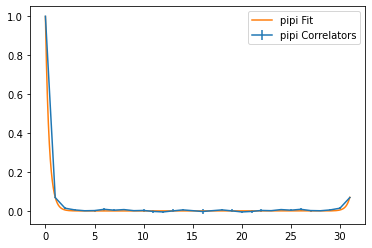

In [12]:
Spec.plot_fit("pipi")
plt.legend()

ss energy is 2.6704732435833236/a +- 0.07542605606452835/a


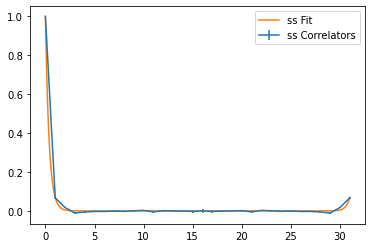

In [13]:
Spec.plot_fit("ss")
plt.legend()

pipi_pipi_I0 energy is 0.46762676086030447/a +- 0.008100950335956194/a


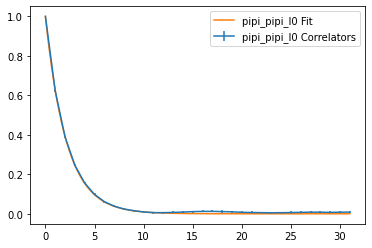

In [13]:
Spec.plot_fit("pipi_pipi_I0")
plt.legend()

pipi_pipi_I2 energy is 0.4879771649075623/a +- 0.008963997367160276/a


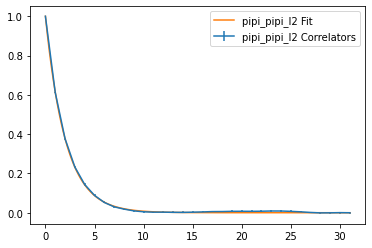

In [14]:
Spec.plot_fit("pipi_pipi_I2")
plt.legend()

pipi_s energy is 0.24026247105135423/a +- 0.026281713794442836/a


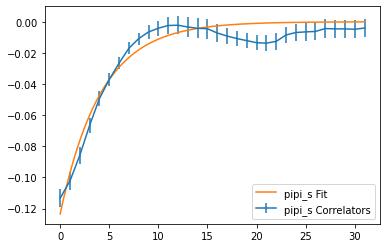

In [15]:
Spec.plot_fit("pipi_s")
plt.legend()

pipim0 energy is 0.4498363441394715/a +- 0.003256950147282356/a


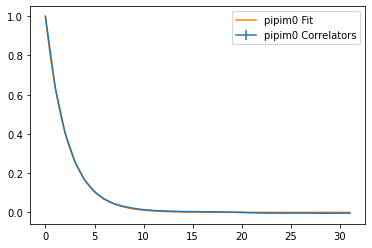

In [16]:
Spec.plot_fit("pipim0")
plt.legend()

ssm0 energy is 0.5749018267008904/a +- 0.004451238170858061/a


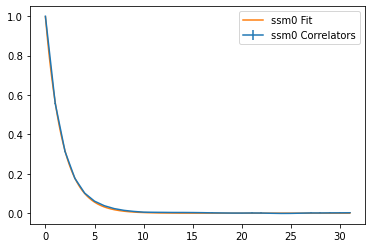

In [17]:
Spec.plot_fit("ssm0")
plt.legend()

pipim_pipim0_I0 energy is 0.9211293742422662/a +- 0.006407316822327495/a


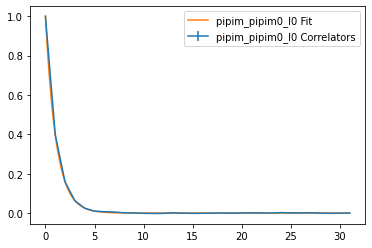

In [18]:
Spec.plot_fit("pipim_pipim0_I0")
plt.legend()

pipim_pipim0_I2 energy is 0.9275721058410525/a +- 0.0054744669234478615/a


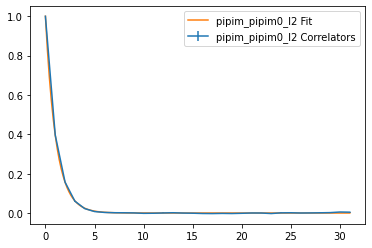

In [19]:
Spec.plot_fit("pipim_pipim0_I2")
plt.legend()

pipim_pipi0_I0 energy is 0.6046192589034756/a +- 0.2213749827449379/a


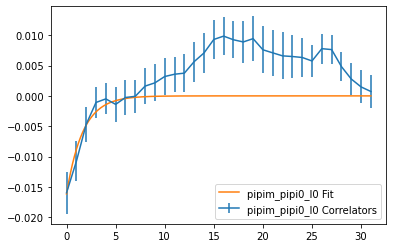

In [20]:
Spec.plot_fit("pipim_pipi0_I0")
plt.legend()

pipim_pipi0_I2 energy is -0.03097844245575214/a +- 0.18286032193326357/a


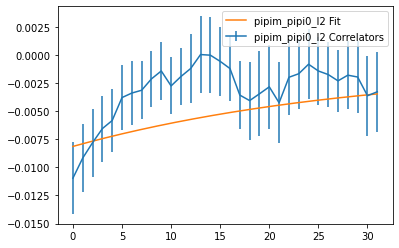

In [21]:
Spec.plot_fit("pipim_pipi0_I2")
plt.legend()

pipim_s0 energy is 0.3248492661696741/a +- 0.04406386729488304/a


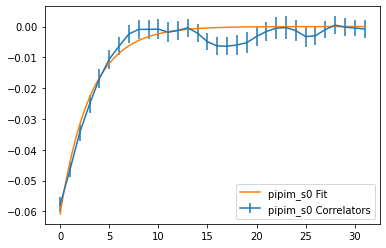

In [22]:
Spec.plot_fit("pipim_s0")
plt.legend()

In [45]:
Spec.use_matrix([["pipi_pipi_I0",   "pipi_s",   "pipim_pipi0_I0"],
                 ["pipi_s",      "ss",       "pipim_s0"],
                 ["pipim_pipi0_I0", "pipim_s0", "pipim_pipim0_I0"]])
#Spec.use_matrix([["pipi_pipi", "pipi_s"],
#                 ["pipi_s", "ss"]])

In [51]:
m1 = []
m1_err = []
m2 = []
m2_err = []
m3 = []
m3_err = []
fact = 0.135/Spec.energies["pipi"]
for i in range(5):
    a = Spec.get_spectrum(i)
    m1.append(a[0][0]*fact)
    m1_err.append(a[1][0]*fact)
    m2.append(a[0][1]*fact)
    m2_err.append(a[1][1]*fact)
    m3.append(a[0][2]*fact)
    m3_err.append(a[1][2]*fact)

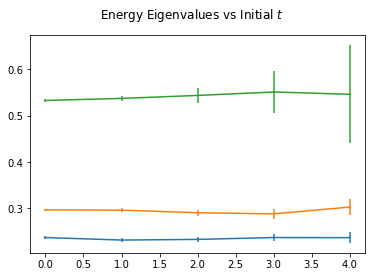

In [52]:
fig,ax = plt.subplots()

plt.errorbar(range(5), m1, yerr=m1_err)
plt.errorbar(range(5), m2, yerr=m2_err)
plt.errorbar(range(5), m3, yerr=m3_err)

fig.suptitle("Energy Eigenvalues vs Initial $t$")
fig.savefig("energies.png")

In [48]:
m1

[0.4132809235436462,
 0.4038843988919259,
 0.4063240653587389,
 0.4132644596341246,
 0.41276045576185905]

In [54]:
Spec.use_matrix([["pipi_pipi_I0", "pipim_pipi0_I0"],
                 ["pipim_pipi0_I0", "pipim_pipim0_I0"]])

In [55]:
m1 = []
m1_err = []
m2 = []
m2_err = []
fact = 0.135/Spec.energies["pipi"]
for i in range(5):
    a = Spec.get_spectrum(i)
    m1.append(a[0][0]*fact)
    m1_err.append(a[1][0]*fact)
    m2.append(a[0][1]*fact)
    m2_err.append(a[1][1]*fact)

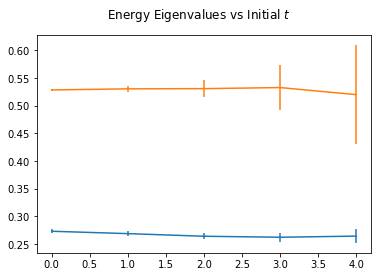

In [57]:
fig,ax = plt.subplots()

plt.errorbar(range(5), m1, yerr=m1_err)
plt.errorbar(range(5), m2, yerr=m2_err)

fig.suptitle("Energy Eigenvalues vs Initial $t$")
fig.savefig("energies.png")

# Old Stuff

In [8]:
r=[]
E=[]
kinematic_ms = [[1,0,0,0],
                [0,1,0,0],
                [0,0,1,0],
                [1,1,0,0],
                [1,0,1,0],
                [0,1,1,0],
                [1,1,1,0],
                [-1,1,1,0],
                [1,-1,1,0],
                [1,1,-1,0],
                [2,0,0,0],
                [0,2,0,0],
                [0,0,2,0],
                [3,0,0,0],
                [0,3,0,0],
                [0,0,3,0]]
for i in range(16):
    E.append(data.find_mass_from_fit(np.real(pim_corr_avgs[i]))[0])
    r.append((kinematic_ms[i][0]**2+kinematic_ms[i][1]**2+kinematic_ms[i][2]**2+kinematic_ms[i][3]**2)**0.5)
plt.plot(r,E)

NameError: name 'data' is not defined

# $\langle \sigma \pi(p)\pi(-p)\rangle$

<ErrorbarContainer object of 3 artists>

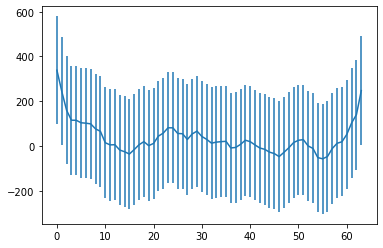

In [22]:
m=0
pipim_s_corr_avgs_bc, pipim_s_corr_errs = C.get_errors_from_blocks(C.corr_avgs["pipim_s"][m], C.corrs["pipim_s"][m])
plt.errorbar(range(len(pipim_s_corr_avgs_bc)), np.real(pipim_s_corr_avgs_bc), yerr=np.real(pipim_s_corr_errs))

<ErrorbarContainer object of 3 artists>

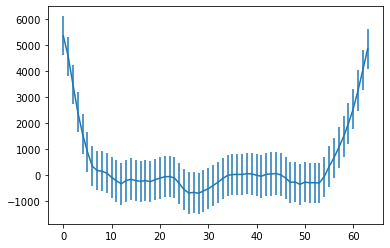

In [23]:
pipi_s_corr_avgs_bc, pipi_s_corr_errs = C.get_errors_from_blocks(C.corr_avgs["pipi_s"], C.corrs["pipi_s"])
plt.errorbar(range(len(pipi_s_corr_avgs_bc)), np.real(pipi_s_corr_avgs_bc), yerr=np.real(pipi_s_corr_errs))

<ErrorbarContainer object of 3 artists>

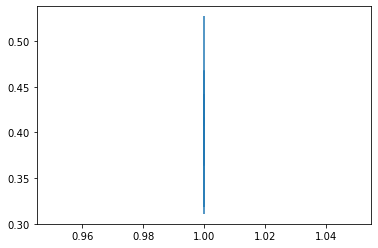

In [18]:
r=[]
E=[]
E_err=[]
kinematic_ms = [[1,0,0,0],
                [0,1,0,0],
                [0,0,1,0],
                [1,1,0,0],
                [1,0,1,0],
                [0,1,1,0],
                [1,1,1,0],
                [-1,1,1,0],
                [1,-1,1,0],
                [1,1,-1,0],
                [2,0,0,0],
                [0,2,0,0],
                [0,0,2,0],
                [3,0,0,0],
                [0,3,0,0],
                [0,0,3,0]]
for i in range(3):
    data.calc_pipim_sigma_energy(i)
    E.append(data.pipim_sigma_E[i])
    E_err.append(data.pipim_sigma_E_err[i])
    r.append((kinematic_ms[i][0]**2+kinematic_ms[i][1]**2+kinematic_ms[i][2]**2+kinematic_ms[i][3]**2)**0.5)

plt.errorbar(r,E, yerr=E_err)

# $\langle \pi\pi(p)\pi\pi(p)\rangle$

<ErrorbarContainer object of 3 artists>

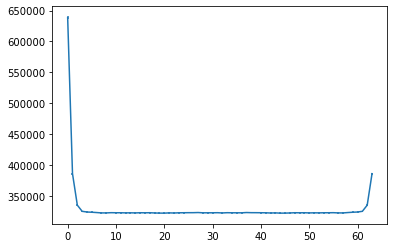

In [38]:
m=0
pipim_pipim_corr_avgs_bc, pipim_pipim_corr_errs = C.get_errors_from_blocks(C.corr_avgs["pipim_pipim"][m], C.corrs["pipim_pipim"][m])
plt.errorbar(range(len(pipim_pipim_corr_avgs_bc)), np.real(pipim_pipim_corr_avgs_bc), yerr=np.real(pipim_pipim_corr_errs))

In [37]:
C.calc_pipim_pipim_corrs()

In [40]:
C.vev["psqm"]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

<ErrorbarContainer object of 3 artists>

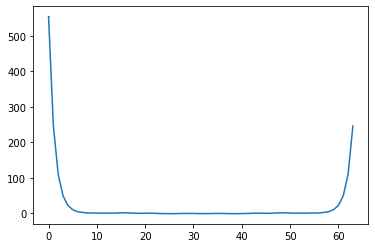

In [41]:
m=0
sm_corr_avgs_bc, sm_corr_errs = C.get_errors_from_blocks(C.corr_avgs["ssm"][m], C.corrs["ssm"][m])
plt.errorbar(range(len(sm_corr_avgs_bc)), np.real(sm_corr_avgs_bc), yerr=np.real(sm_corr_errs))

<ErrorbarContainer object of 3 artists>

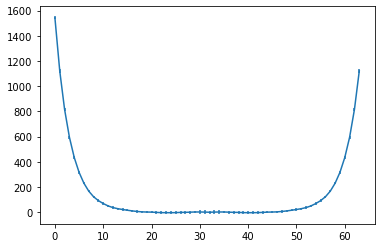

In [42]:
s_corr_avgs_bc, s_corr_errs = C.get_errors_from_blocks(C.corr_avgs["ss"], C.corrs["ss"])
plt.errorbar(range(len(s_corr_avgs_bc)), np.real(s_corr_avgs_bc), yerr=np.real(s_corr_errs))